In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip -q "severstal-steel-defect-detection.zip" -d "/content/gdrive/MyDrive/Steel"

In [ ]:
import os
os.chdir("/content/gdrive/MyDrive")

In [ ]:
import os
os.chdir("/content/gdrive/MyDrive/Steel")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_df = pd.read_csv('train.csv')
print("Number of defective samples: ", train_df.shape[0])
train_df.head()

In [ ]:
import os
import pandas as pd
import shutil
os.chdir("/content/gdrive/MyDrive/Steel")
train_csv_path = "/content/gdrive/MyDrive/Steel/train.csv"
train_images_folder = "/content/gdrive/MyDrive/Steel/train_images"
defective_folder = "/content/gdrive/MyDrive/Steel/defective"
non_defective_folder = "/content/gdrive/MyDrive/Steel/non_defective"

os.makedirs(defective_folder, exist_ok=True)
os.makedirs(non_defective_folder, exist_ok=True)

df = pd.read_csv(train_csv_path)

defective_image_ids = set(df["ImageId"].tolist())
for image_name in os.listdir(train_images_folder):
    image_path = os.path.join(train_images_folder, image_name)

    if image_name in defective_image_ids:
        shutil.move(image_path, os.path.join(defective_folder, image_name))
    else:
        shutil.move(image_path, os.path.join(non_defective_folder, image_name))

print("Images have been organized into 'defective' and 'non_defective' folders.")

Images have been organized into 'defective' and 'non_defective' folders.


In [ ]:
train_images_folder = "non_defective"
total_images = len([f for f in os.listdir(train_images_folder) if f.endswith('.jpg')])

print(f"Total images in train_images folder: {total_images}")

Total images in train_images folder: 5902


In [ ]:
train_images_folder = "defective"
total_images = len([f for f in os.listdir(train_images_folder) if f.endswith('.jpg')])

print(f"Total images in train_images folder: {total_images}")

Total images in train_images folder: 6666


In [ ]:
!pip install split-folders

In [ ]:
dataset_path = '/content/gdrive/MyDrive/Steel'
all_entries = os.listdir(dataset_path)
image_extensions = ('.jpg', '.jpeg', '.png')
image_files = [file for file in all_entries if file.endswith(image_extensions)]

print("Image Files:", image_files)

Image Files: []


In [ ]:
defective_path = os.path.join(dataset_path, 'defective')
non_defective_path = os.path.join(dataset_path, 'non_defective')

defective_images = [file for file in os.listdir(defective_path) if file.endswith(image_extensions)]
non_defective_images = [file for file in os.listdir(non_defective_path) if file.endswith(image_extensions)]

print("Defective Images:", defective_images)
print("Non-Defective Images:", non_defective_images)

Defective Images: ['0002cc93b.jpg', '0007a71bf.jpg', '000a4bcdd.jpg', '000f6bf48.jpg', '0014fce06.jpg', '0025bde0c.jpg', '002af848d.jpg', '002fc4e19.jpg', '0030401a5.jpg', '0046839bd.jpg', '005d86c25.jpg', '005f02e20.jpg', '005f19695.jpg', '008621629.jpg', '0088260da.jpg', '008d0f87b.jpg', '008ef3d74.jpg', '0095cd374.jpg', '00ac8372f.jpg', '00af2671f.jpg', '00bc01bfe.jpg', '00bf8497a.jpg', '00c88fed0.jpg', '00cdb56a0.jpg', '00d639396.jpg', '00e0398ad.jpg', '00ec97699.jpg', '00f1665e6.jpg', '00f6e702c.jpg', '01053d28f.jpg', '010db68d1.jpg', '012a9a4c7.jpg', '012d29df4.jpg', '012f26693.jpg', '01338c0ea.jpg', '0139dd004.jpg', '0141c9bf3.jpg', '0148e9891.jpg', '014ebe543.jpg', '01540cab1.jpg', '01661826d.jpg', '0167a740e.jpg', '016af13d0.jpg', '016efe618.jpg', '01764ee81.jpg', '017c828a1.jpg', '018ccdfed.jpg', '01919944c.jpg', '019f42c2a.jpg', '01a1027ce.jpg', '01afbfa7a.jpg', '01b043500.jpg', '01b492dd6.jpg', '01c3ef286.jpg', '01cf446d4.jpg', '01cfacf80.jpg', '01df77e59.jpg', '01e020dc5.j

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

def list_and_filter_images(dataset_path):
    image_extensions = ('.jpg', '.jpeg', '.png')
    defective_path = os.path.join(dataset_path, 'defective')
    non_defective_path = os.path.join(dataset_path, 'non_defective')
    defective_images = []
    non_defective_images = []
    if os.path.exists(defective_path):
        defective_images = [os.path.join(defective_path, file) for file in os.listdir(defective_path) if file.endswith(image_extensions)]
    if os.path.exists(non_defective_path):
        non_defective_images = [os.path.join(non_defective_path, file) for file in os.listdir(non_defective_path) if file.endswith(image_extensions)]
    return defective_images, non_defective_images


def split_and_save_images(defective_images, non_defective_images, output_dir, test_size=0.1, val_size=0.1):
    for split in ['train', 'val', 'test']:
        for category in ['defective', 'non_defective']:
            os.makedirs(os.path.join(output_dir, split, category), exist_ok=True)
    if len(defective_images) > 0:
        train_def, test_def = train_test_split(defective_images, test_size=test_size, random_state=42)
        train_def, val_def = train_test_split(train_def, test_size=val_size / (1 - test_size), random_state=42)
    else:
        train_def, val_def, test_def = [], [], []

    if len(non_defective_images) > 0:
        train_nondef, test_nondef = train_test_split(non_defective_images, test_size=test_size, random_state=42)
        train_nondef, val_nondef = train_test_split(train_nondef, test_size=val_size / (1 - test_size), random_state=42)
    else:
        train_nondef, val_nondef, test_nondef = [], [], []

    def copy_files(file_list, target_dir):
        for file in file_list:
            shutil.copy(file, target_dir)

    copy_files(train_def, os.path.join(output_dir, 'train', 'defective'))
    copy_files(val_def, os.path.join(output_dir, 'val', 'defective'))
    copy_files(test_def, os.path.join(output_dir, 'test', 'defective'))

    copy_files(train_nondef, os.path.join(output_dir, 'train', 'non_defective'))
    copy_files(val_nondef, os.path.join(output_dir, 'val', 'non_defective'))
    copy_files(test_nondef, os.path.join(output_dir, 'test', 'non_defective'))

def count_images_in_folder(folder_path):
    image_extensions = ('.jpg', '.jpeg', '.png')
    count = 0
    for root, dirs, files in os.walk(folder_path):
        count += len([file for file in files if file.endswith(image_extensions)])
    return count

if __name__ == "__main__":
    dataset_path = '/content/gdrive/MyDrive/Steel'
    output_dir = 'output'

    defective_images, non_defective_images = list_and_filter_images(dataset_path)

    print(f"Defective Images Found: {len(defective_images)}")
    print(f"Non-Defective Images Found: {len(non_defective_images)}")

    if len(defective_images) == 0 and len(non_defective_images) == 0:
        print("No images found in the dataset. Please ensure the folders contain valid image files.")
    else:
        split_and_save_images(defective_images, non_defective_images, output_dir)
        for split in ['train', 'val', 'test']:
            defective_count = count_images_in_folder(os.path.join(output_dir, split, 'defective'))
            non_def_count = count_images_in_folder(os.path.join(output_dir, split, 'non_defective'))

            print(f"{split.capitalize()} Set - Defective: {defective_count}, Non-Defective: {non_def_count}")

Defective Images Found: 6666
Non-Defective Images Found: 5902
Train Set - Defective: 5332, Non-Defective: 4720
Val Set - Defective: 667, Non-Defective: 591
Test Set - Defective: 667, Non-Defective: 591


Convolutional Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'output/train'
val_dir = 'output/val'
test_dir = 'output/test'

IMG_HEIGHT = 640
IMG_WIDTH = 640
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'  # Binary classification (defective vs non-defective)
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

EPOCHS = 10

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

model.save('cnn_defective_non_defective_model.h5')

Found 5688 images belonging to 2 classes.
Found 667 images belonging to 2 classes.
Found 667 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


178/178 ━━━━━━━━━━━━━━━━━━━━ 1367s 7s/step - accuracy: 0.9242 - loss: 0.3131 - val_accuracy: 1.0000 - val_loss: 0.0629
Epoch 2/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 78s 225ms/step - accuracy: 0.9370 - loss: 0.2096 - val_accuracy: 1.0000 - val_loss: 0.0841
Epoch 3/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 81s 222ms/step - accuracy: 0.9402 - loss: 0.1892 - val_accuracy: 1.0000 - val_loss: 0.0501
Epoch 4/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 40s 219ms/step - accuracy: 0.9467 - loss: 0.1589 - val_accuracy: 0.9865 - val_loss: 0.0589
Epoch 5/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 42s 232ms/step - accuracy: 0.9455 - loss: 0.1558 - val_accuracy: 0.9970 - val_loss: 0.0547
Epoch 6/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 79s 216ms/step - accuracy: 0.9506 - loss: 0.1480 - val_accuracy: 0.9910 - val_loss: 0.0463
Epoch 7/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 42s 220ms/step - accuracy: 0.9503 - loss: 0.1326 - val_accuracy: 0.9985 - val_loss: 0.0310
Epoch 8/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 41s 218ms/step - accuracy: 0.9581 - loss: 0.1142 - val_

Test Accuracy: 0.99


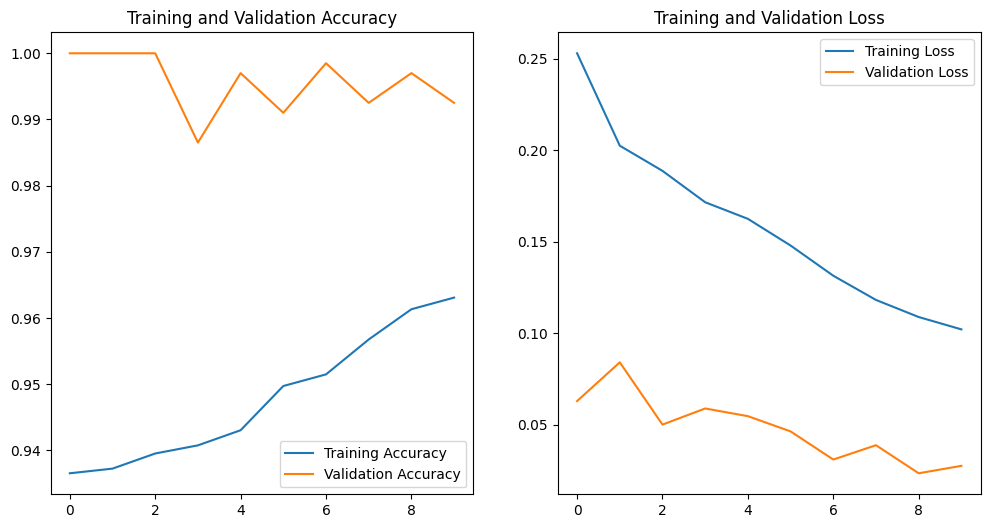

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()